# Estimate Oatmilk Concentrations for Target Optical Transmission Levels

## Workspace setup

In [16]:
# Import libraries
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [ ]:
# Define data points
oatmilk = [0.1, 5]
transmission = [75, 0.5]
goal_transmit = np.array([99.5, 90, 80, 70, 60, 50, 40, 30])

## Predict Linear Relationship

In [6]:
# Find parameters that define the linear regression
result = stats.linregress(oatmilk, transmission, alternative="less")

In [ ]:
# Find oatmilk concentrations for target optical transmission
# goal_transmit = np.array([99.5, 90, 80, 70, 60, 50, 40, 30])
m = result.slope
b = result.intercept
milk_func = lambda y: (y-b)/m
goal_milk = milk_func(goal_transmit)

Text(0.5, 1.0, 'Optical Transmission in Oatmilk Solutions')

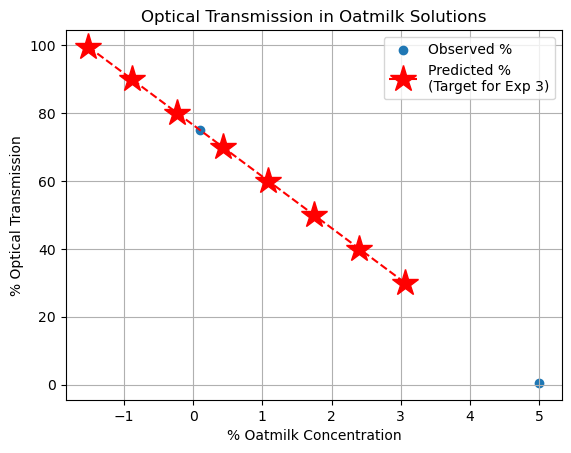

In [23]:
fig0, ax0 = plt.subplots()
plt.scatter(oatmilk, transmission, label="Observed %")
plt.plot(goal_milk, goal_transmit, "r--*", label="Predicted %\n(Target for Exp 3)", markersize=20)
ax0.set_xlabel("% Oatmilk Concentration")
ax0.set_ylabel("% Optical Transmission")
ax0.grid()
plt.legend()
plt.title("Optical Transmission in Oatmilk Solutions")

## Predict Exponential Relationship

In [ ]:
# Try an exponential relationship of form y = a*b^-x
# The expressions for a and b were solved manually
# from the 2 points we have.
a = (150**(-5/5.1))/2
b = 150**(-1/5.1)
print (a, b)

0.003677453596483899 0.37438241324726695


In [65]:
# Find new goal_milk with log10 relationship
goal_milk = np.log10(a/goal_transmit)/np.log10(b)
print(goal_milk)

[10.38771094 10.28557326 10.16568957 10.02977664  9.87287668  9.68730342
  9.4601801   9.16736722]


Text(0.5, 1.0, 'Optical Transmission in Oatmilk Solutions')

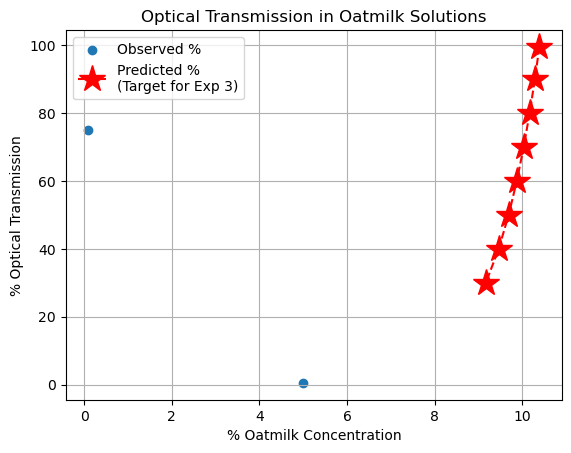

In [66]:
fig1, ax1 = plt.subplots()
plt.scatter(oatmilk, transmission, label="Observed %")
plt.plot(goal_milk, goal_transmit, "r--*", label="Predicted %\n(Target for Exp 3)", markersize=20)
ax1.set_xlabel("% Oatmilk Concentration")
ax1.set_ylabel("% Optical Transmission")
ax1.grid()
plt.legend()
plt.title("Optical Transmission in Oatmilk Solutions")

## Predict Exponential Decay Function

In [45]:
# Try an exponential relationship of form y = a*e^kx
# The expressions for a and k were solved manually
# from the points (0.1, 75) and (0, 100).
a = 100
k = (-1/0.1)*np.log(3/4)
# a = 75/np.exp((-0.1*k))
print(a, k)

100 2.876820724517809


In [54]:
# Find target oatmilk concentrations for target optical transmission
goal_milk = (-1/k)*np.log((goal_transmit/a))
print(goal_milk)

[0.00174239 0.03662394 0.07756603 0.12398233 0.17756603 0.24094208
 0.31850811 0.41850811]


In [47]:
# find y for x in [-0.2, 5]
x = np.linspace(-0.2, 5.2, 100)
y = a*np.exp((-k*x))
# print(x, y)

Text(0.5, 1.0, 'Optical Transmission in Oatmilk Solutions')

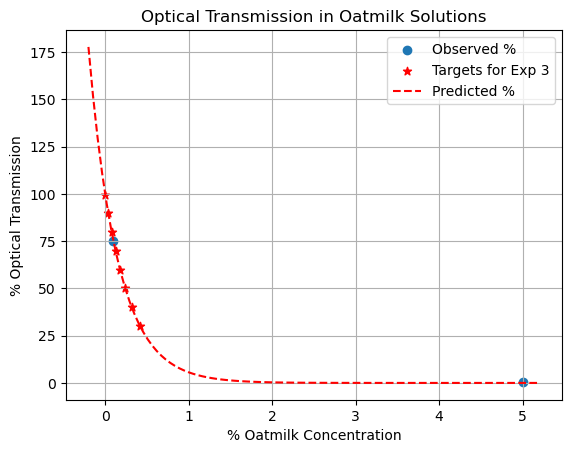

In [55]:
fig2, ax2 = plt.subplots()
plt.scatter(oatmilk, transmission, label="Observed %")
plt.scatter(goal_milk, goal_transmit, marker="*", c="r", label="Targets for Exp 3")
plt.plot(x, y, "r--", label="Predicted %")
ax2.set_xlabel("% Oatmilk Concentration")
ax2.set_ylabel("% Optical Transmission")
ax2.grid()
plt.legend()
plt.title("Optical Transmission in Oatmilk Solutions")

In [58]:
# Check optical transmission at 1.5% and 2% oatmilk concentration
near0 = np.array([1.5, 2, 5])
print((a*np.exp((-k*near0))))

[1.33634610e+00 3.17121194e-01 5.66321656e-05]


In [63]:
# Check optical transmission from model at 0.1% oatmilk concentration
p = a*np.exp((-k*0.1))
print(p)

75.0


## Find proportion of oatmilk to water for target values

Although the exponential function without an offset is not an accurate representation at negative (un-physical) and 5% oatmilk concentrations, hopefully it is a good enough approximation near 0% oatmilk.

In [ ]:
# Find volume in ml of 30% concentration needed out of 100 ml 
vol_milk = goal_milk/0.3
vol_milk

array([0.00580796, 0.12207981, 0.25855342, 0.41327444, 0.59188675,
       0.80314028, 1.0616937 , 1.39502703])

## Compare Prediction with Results from Oatmilk Trials

TO-DO